<a href="https://www.kaggle.com/code/ebruiserisobay/flo-customer-segmentation-w-unsupervised-learning?scriptVersionId=188881061" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

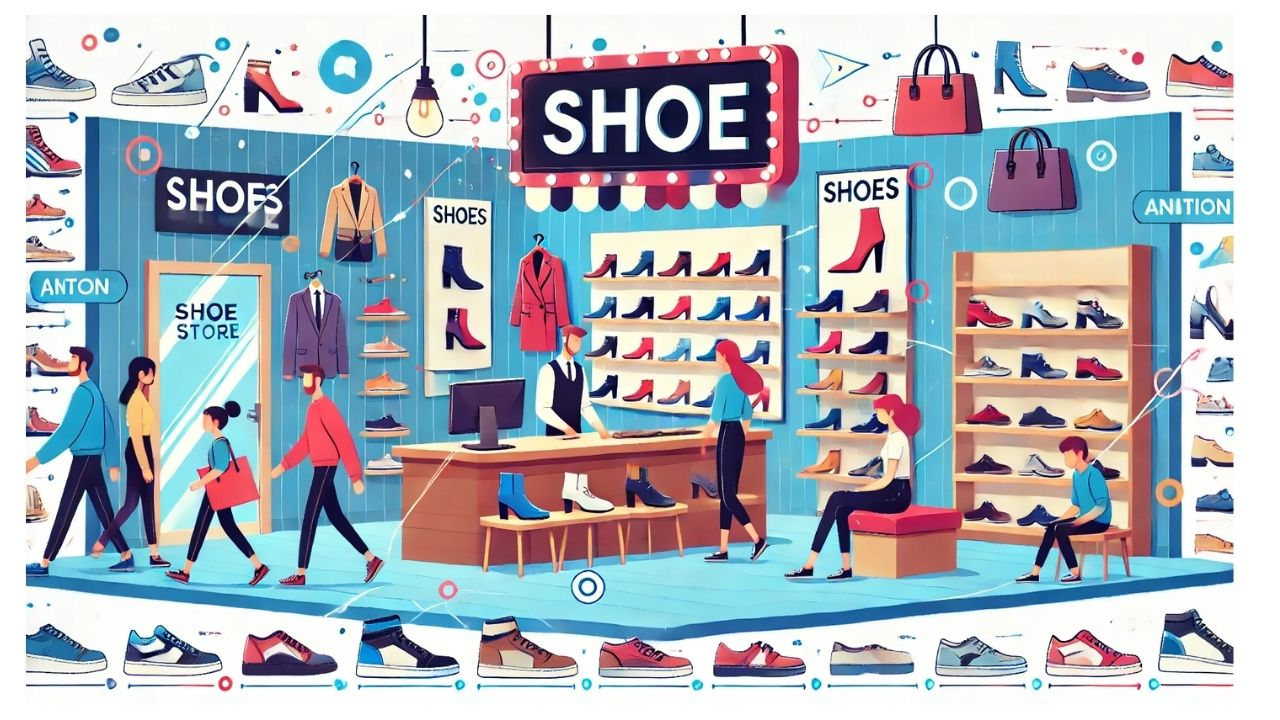

# FLO - Customer Segmentation
 
 # Introduction
<font color='#000000' style='font-weight:bold;'>

**1.** [Business Problem](#1)
    
**2.** [About Dataset](#2)
    
**3.** [Data Loading & Checking](#3)
    
**4.** [Exploratory Data Analysis (EDA)](#4)
   
* **4.1** [Analysis of Categorical Variables](#5)
* **4.2** [Analysis of Numerical Variables](#6)
* **4.3** [Outlier Analysis](#7)
* **4.4** [Correlation Analysis](#8)
    
**5.** [Data Preprocessing](#9)
    
* **5.1** [Missing Values ](#10)
* **5.2** [Outlier Supression](#11)
    
**6.** [Feature Engineering](#12)
    
* **6.1** [Feature Extraction](#13)
* **6.2** [Feature Scaling](#14)
    
**7.** [Model](#15)
* **7.1** [Customer Segmentation with K-Means](#16)
* **7.2** [Customer Segmentation with Hierarchical Clustering](#17)


<a id = "1"></a><br>
<div style="background-color:#add8e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>1. Business Problem</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

To segment FLO customers and determine marketing strategies based on these segments, customer behaviors have been defined, and groups have been formed based on the clustering in these behaviors.

<a id = "2"></a>
<div style="background-color:#add8e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>2. About Dataset</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

The data set consists of information obtained from the past shopping behavior of customers who made their last purchases as OmniChannel (both online and offline shoppers) in 2020 - 2021.

* **master_id:** Unique customer number
* **order_channel :** Which channel of the shopping platform is used (Android, iOS, Desktop, Mobile, Offline)
* **ast_order_channel :**The channel where the last purchase was made
* **first_order_date :** Date of the customer's first purchase
* **last_order_date :** Date of the customer's last purchase
* **last_order_date_online :** The date of the last purchase made by the customer on the online platform
* **last_order_date_offline :** Date of the last purchase made by the customer on the offline platform
* **order_num_total_ever_online :** Total number of purchases made by the customer on the online platform
* **order_num_total_ever_offline :** Total number of purchases made by the customer offline
* **customer_value_total_ever_offline :** Total price paid by the customer for offline purchases
* **customer_value_total_ever_online :** Total price paid by the customer for online purchases
* **interested_in_categories_12 :** List of categories the customer has shopped in the last 12 months

<a id = "3"></a><br>
<div style="background-color:#add8e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>3. Data Loading & Checking</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [1]:
!pip install missingno as msno
!pip install pydotplus
!pip install astor
!pip install joblib
!pip install skompiler
!pip install yellowbrick

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler

import joblib 
import pydotplus
from skompiler import skompile
import datetime as dt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering


from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action="ignore")
from sklearn.exceptions import ConvergenceWarning

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=e4546befb844f26e55cbe17da6a11c3368166f4e010c12db6c0f2c9f072a4d41
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54311 sha256=e6eab3cee84972882872ced3fb8699d94cbbcb27a4fb9f539b7e80fd049e65f7
  Stored in directory: /root/.cache/pip/wheels/c0/22/3d/bd8fd4c6cd205cf122a0974be908681472a6f44abd6b880614
Successfully built skompiler


In [2]:
#upload the dataset:

df_ = pd.read_csv("/kaggle/input/flo-dataset/flo_data_20k.csv") 

In [3]:
# defining a function to upload the dataset

def load(dataframe): 
    df = dataframe.copy()
    return df

In [4]:
df = load(df_) # copy of the dataset
df.head() # #display first 5 rows

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


<a id = "4"></a><br>
<div style="background-color:#add8e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>4. Exploratory Data Analysis (EDA)</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [5]:
# defining function to check all: 

def check_df(dataframe,head = 5):
    print("##################### SHAPE ####################")
    print(dataframe.shape)
    print("#################### COLUMNS ###################")
    print(dataframe.columns)
    print("#################### INDEX ###################")
    print(dataframe.index)
    print("#################### TYPES ##################")
    print(dataframe.dtypes)
    print("#################### NA ANY ###################")
    print(dataframe.isnull().values.any())
    print(f"#################### NA SUM - RATIO ####################")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(),
                        "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("#################### QUANTILES ###############")
    print(dataframe.describe().T)

check_df(df)

##################### SHAPE ####################
(19945, 12)
#################### COLUMNS ###################
Index(['master_id', 'order_channel', 'last_order_channel', 'first_order_date',
       'last_order_date', 'last_order_date_online', 'last_order_date_offline',
       'order_num_total_ever_online', 'order_num_total_ever_offline',
       'customer_value_total_ever_offline', 'customer_value_total_ever_online',
       'interested_in_categories_12'],
      dtype='object')
#################### INDEX ###################
RangeIndex(start=0, stop=19945, step=1)
#################### TYPES ##################
master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline

In [6]:
# Converting date columns to datetime type

date_columns = ["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [7]:
#checking:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [8]:
# Capturing numeric and categorical variables:

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # cat_cols, cat_but_car:
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols , cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [9]:
print(f"Categoric columns:{len(cat_cols)}") # categorical columns
print(f"Numeric columns:{len(num_cols)}") # numeric columns
print(f"Cardinal columns:{len(cat_but_car)}") # categorical type but cardinal columns
print(f"Checking: total columns(cat_num_car):{len(cat_cols + num_cols + cat_but_car)} , dataset total columns:{len(df.columns)}")

Categoric columns:2
Numeric columns:8
Cardinal columns:2
Checking: total columns(cat_num_car):12 , dataset total columns:12


In [10]:
cat_but_car # categorical type but cardinal columns

['master_id', 'interested_in_categories_12']

> **Editing column types which we need:**

In [11]:
# defining a function to update cat_cols & num_cols by cat_but_car:

def col_types_updating_with_id_columns(dataframe,id_cols,car_but_cat_cols = [],cat_but_num_wrong = [],date_columns =[]):
    # updating num_cols,cat_cols:
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    for col in cat_but_car:    
        if len(cat_but_car) > 0:
            num_cols.append(col)
            cat_cols.append(col)
            num_cols = [n_col for n_col in num_cols if (n_col not in id_cols) & (n_col not in car_but_cat_cols)]
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols) & (c_col not in num_cols)]
        else:continue
    for col in cat_but_num_wrong:    
        if len(cat_but_num_wrong) > 0:
            cat_cols.append(col)
            num_cols.remove(col)
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols)]
        else:continue 
    for col in date_columns:    
        if len(date_columns) > 0:
            if col in cat_cols:
                cat_cols.remove(col)
            if col in num_cols:
                num_cols.remove(col)
            date_cols = [d_col for d_col in date_columns if (d_col not in id_cols)]
        else:continue  
    return num_cols,cat_cols,date_cols

In [12]:
ids = ['master_id']

In [13]:
car_but_cat_cols = ["interested_in_categories_12"]

In [14]:
date_cols = ["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"]

In [15]:
# applying the function:

num_cols,cat_cols,date_cols = col_types_updating_with_id_columns(df,id_cols = ids ,car_but_cat_cols = car_but_cat_cols, date_columns = date_cols)

In [16]:
cat_but_car

['master_id', 'interested_in_categories_12']

In [17]:
date_cols

['first_order_date',
 'last_order_date',
 'last_order_date_online',
 'last_order_date_offline']

In [18]:
cat_cols

['order_channel', 'last_order_channel', 'interested_in_categories_12']

In [19]:
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online']

In [20]:
#defining a function to change dtypes:

def update_not_correct_dtype(dataframe,num_cols,cat_cols):
    not_correct_dtype_n = [col for col in num_cols if dataframe[col].dtypes not in ["float64","int64","int32","datetime64[ns]"]]
    not_correct_dtype_c = [col for col in cat_cols if dataframe[col].dtypes not in ["O","category","datetime64[ns]"]]
    if len(not_correct_dtype_n) > 0:
        for col in not_correct_dtype_n:
            dataframe[col] = dataframe[col].astype("float64")
    if len(not_correct_dtype_c) > 0:    
        for col in not_correct_dtype_c:
            dataframe[col] = dataframe[col].astype("O")
    return not_correct_dtype_n,not_correct_dtype_c

In [21]:
# applying the function:
update_not_correct_dtype(df,num_cols,cat_cols)

([], [])

In [22]:
#checking:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

<a id = "5"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>4.1 Analysis of Categorical Variables</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [23]:
# defining a function to check summary of the categorical variables:

def cat_summary(dataframe,col_name,plot = False):
    print(f"#################### {col_name} Counts - Ratio ####################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"#################### {col_name} Unique Variable Counts ####################")
    print(f"{col_name} : {dataframe[col_name].nunique()}")
    if plot:
        print(f"#################### {col_name} Counts - Ratio Visualizing ####################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

#################### order_channel Counts - Ratio ####################
               order_channel      Ratio
order_channel                          
Android App             9495  47.605916
Mobile                  4882  24.477313
Ios App                 2833  14.204061
Desktop                 2735  13.712710
#################### order_channel Unique Variable Counts ####################
order_channel : 4
#################### order_channel Counts - Ratio Visualizing ####################


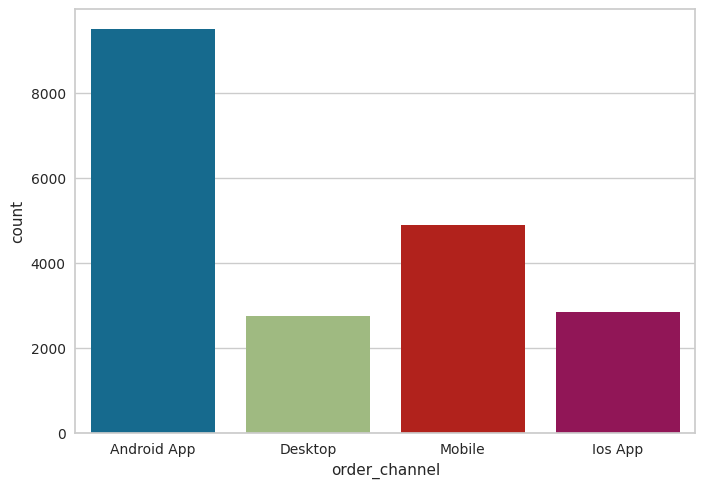

#################### last_order_channel Counts - Ratio ####################
                    last_order_channel      Ratio
last_order_channel                               
Android App                       6783  34.008523
Offline                           6608  33.131111
Mobile                            3172  15.903735
Ios App                           1696   8.503384
Desktop                           1686   8.453246
#################### last_order_channel Unique Variable Counts ####################
last_order_channel : 5
#################### last_order_channel Counts - Ratio Visualizing ####################


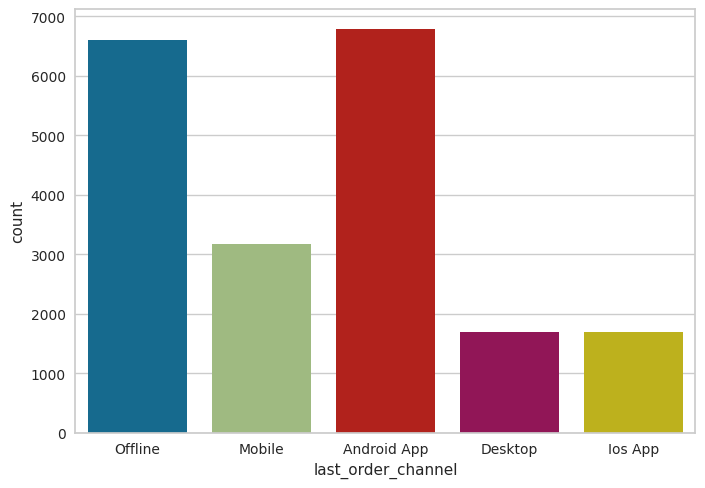

#################### interested_in_categories_12 Counts - Ratio ####################
                                              interested_in_categories_12  \
interested_in_categories_12                                                 
[AKTIFSPOR]                                                          3464   
[KADIN]                                                              2158   
[]                                                                   2135   
[ERKEK]                                                              1973   
[KADIN, AKTIFSPOR]                                                   1352   
[ERKEK, AKTIFSPOR]                                                   1178   
[ERKEK, KADIN]                                                        848   
[COCUK]                                                               836   
[ERKEK, KADIN, AKTIFSPOR]                                             775   
[AKTIFCOCUK]                                                        

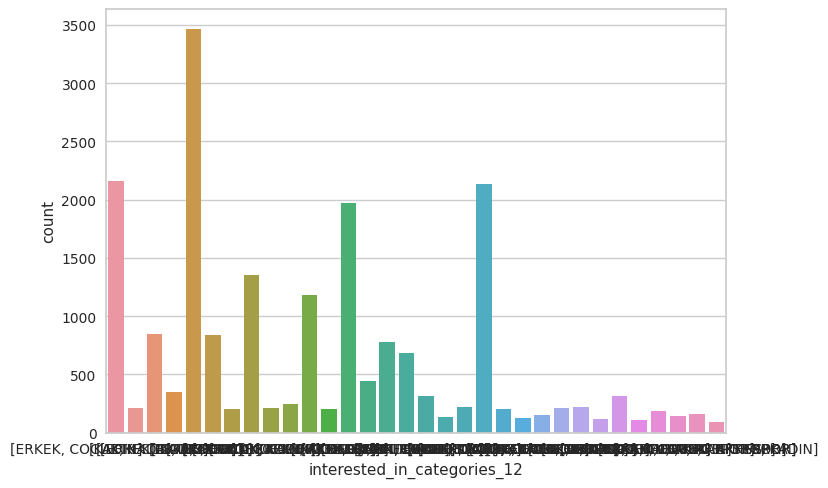

In [24]:
# applying the function:
for col in cat_cols:
    cat_summary(df, col , plot = True)

<a id = "6"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>4.2 Analysis of Numerical Variables</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [25]:
# defining a function to check summary of the numerical variables:

def num_summary(dataframe,col_name,plot = False, quantiles = [0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block = True)
    print("#################### QUANTILES ###############")
    print(dataframe[col_name].describe(quantiles).T, end= "\n\n")

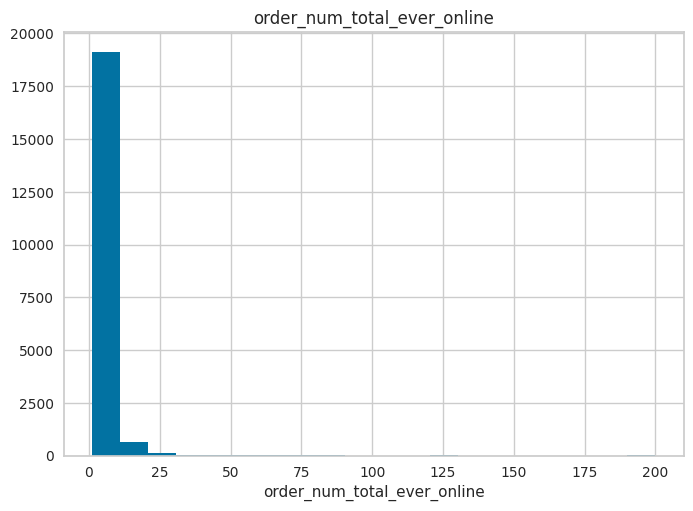

#################### QUANTILES ###############
count    19945.000000
mean         3.110855
std          4.225647
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
50%          2.000000
60%          2.000000
80%          4.000000
90%          7.000000
95%         10.000000
99%         20.000000
max        200.000000
Name: order_num_total_ever_online, dtype: float64



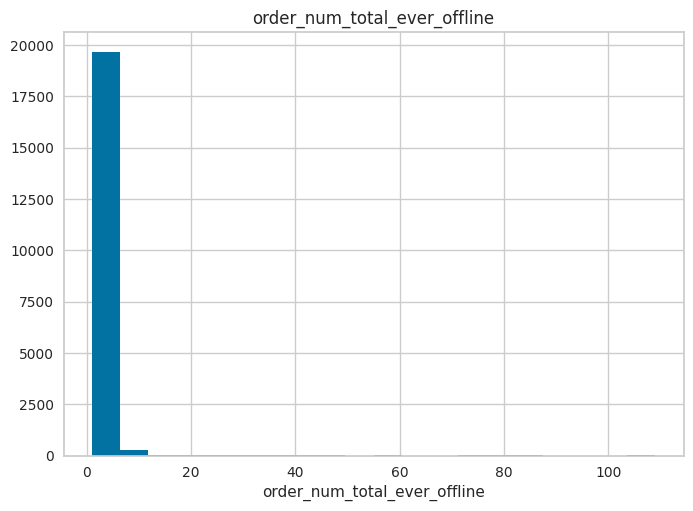

#################### QUANTILES ###############
count    19945.000000
mean         1.913913
std          2.062880
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
50%          1.000000
60%          2.000000
80%          3.000000
90%          4.000000
95%          4.000000
99%          7.000000
max        109.000000
Name: order_num_total_ever_offline, dtype: float64



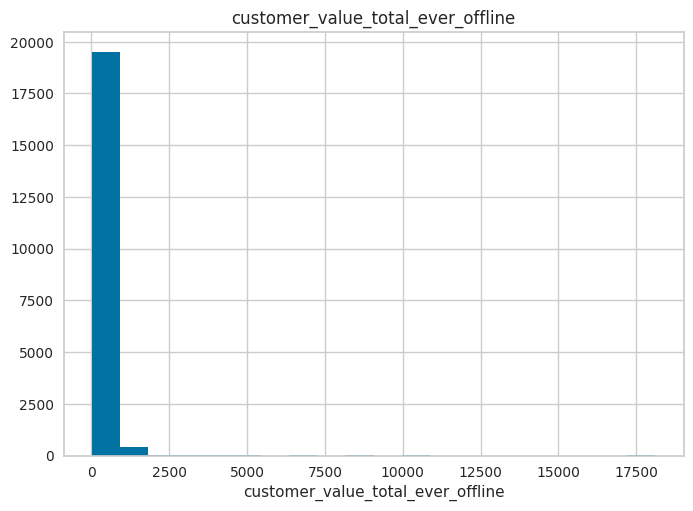

#################### QUANTILES ###############
count    19945.000000
mean       253.922597
std        301.532853
min         10.000000
5%          39.990000
10%         59.990000
20%         89.980000
50%        179.980000
60%        220.860000
80%        365.058000
90%        519.950000
95%        694.222000
99%       1219.946800
max      18119.140000
Name: customer_value_total_ever_offline, dtype: float64



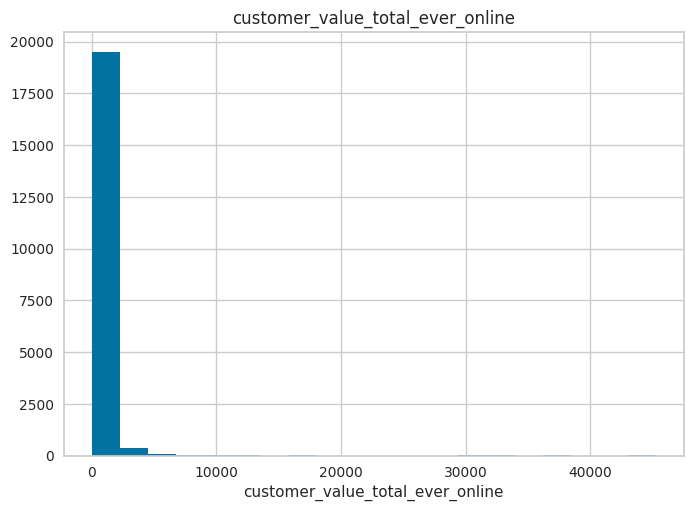

#################### QUANTILES ###############
count    19945.000000
mean       497.321690
std        832.601886
min         12.990000
5%          63.990000
10%         84.990000
20%        125.990000
50%        286.460000
60%        371.944000
80%        690.868000
90%       1082.036000
95%       1556.726000
99%       3143.810400
max      45220.130000
Name: customer_value_total_ever_online, dtype: float64



In [26]:
# applying the function:
for col in num_cols:
    num_summary(df,col,plot=True)

<a id = "7"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>4.3 Outlier Analysis</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

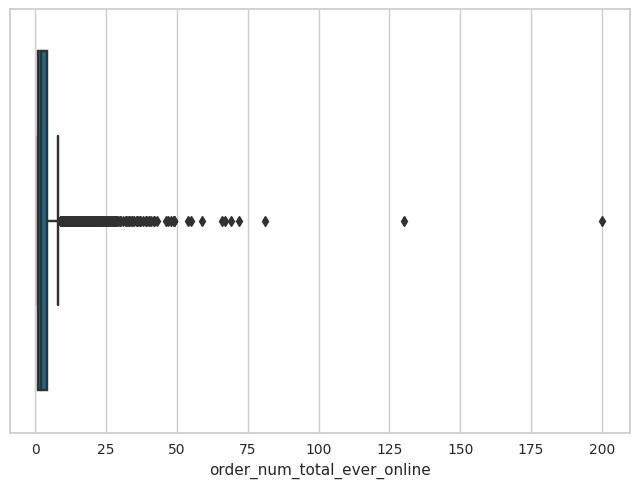

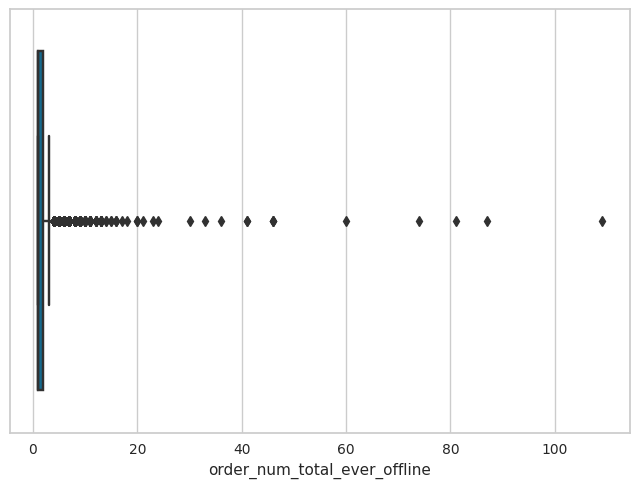

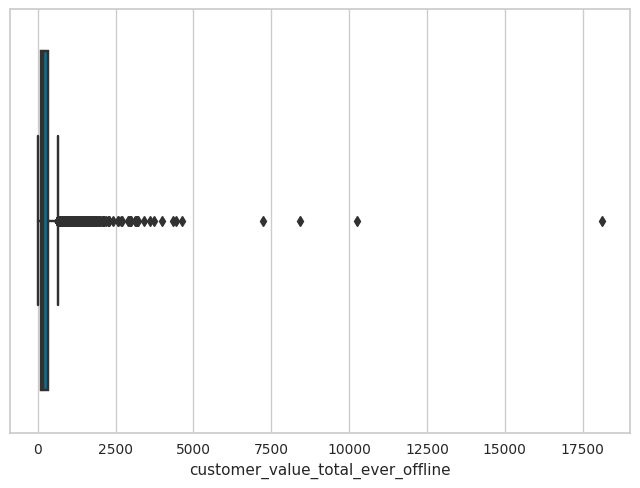

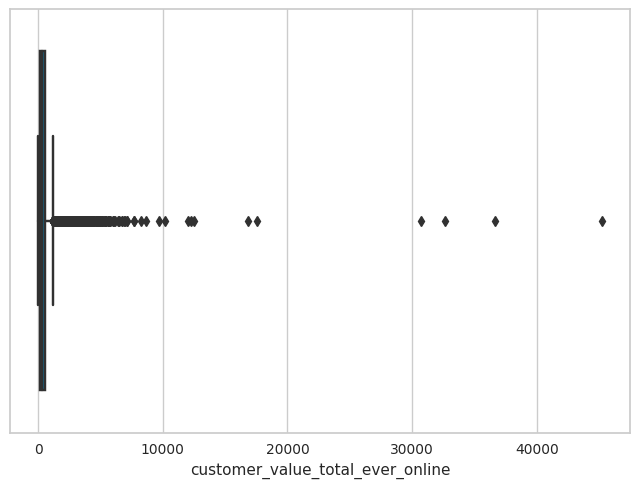

In [27]:
# outlier analysis using graphical techniques:

for col in num_cols:
    sns.boxplot(x= df[col])
    plt.show()

In [28]:
# calculating ouitlier thresholds:

def outlier_thresholds(dataframe,col_name,q1=0.01,q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    return low_limit, up_limit

In [29]:
# checking outlier in the dataframe:

def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [30]:
#checking results:
check_outlier(df, num_cols).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [31]:
#defining a function to check columns outliers:

def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    return results

In [32]:
#checking results:

check_all_columns_outliers(df,num_cols)

{'order_num_total_ever_online': True,
 'order_num_total_ever_offline': True,
 'customer_value_total_ever_offline': True,
 'customer_value_total_ever_online': True}

In [33]:
# listing columns based on outlier information:

def show_column_names_with_outliers_info(dataframe,col_list):
    print("################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################")
    for col in col_list:
        low, up = outlier_thresholds(dataframe,col)
        print(f"{col} : low: {low}, up: {up}",end ="\n")
    print(end="\n\n")
    no_outliers = []
    have_outliers = []
    for col,value in check_all_columns_outliers(dataframe,col_list).items():
        if value:
            have_outliers.append(col)
        else:
            no_outliers.append(col)
    print("################# Numeric Columns Have Outliers  #####################")
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")
    print("################# Numeric Columns Have NOT Outliers #####################")
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")
    return have_outliers,no_outliers

In [34]:
# applying the function:

have_outliers,no_outliers = show_column_names_with_outliers_info(df,num_cols)

################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################
order_num_total_ever_online : low: -27.5, up: 48.5
order_num_total_ever_offline : low: -8.0, up: 16.0
customer_value_total_ever_offline : low: -1779.9452000000003, up: 3019.8820000000005
customer_value_total_ever_online : low: -4615.7406000000055, up: 7799.541000000008


################# Numeric Columns Have Outliers  #####################
['order_num_total_ever_online', 'order_num_total_ever_offline', 'customer_value_total_ever_offline', 'customer_value_total_ever_online']
count_columns: 4

################# Numeric Columns Have NOT Outliers #####################
[]
count_columns: 0



<a id = "8"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>4.4 Correlation Analysis</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [35]:
# calculating correlation :

corr = df[num_cols].corr()
corr

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
order_num_total_ever_online,1.000000,0.021894,0.003018,0.816057
order_num_total_ever_offline,0.021894,1.000000,0.691495,0.011197
customer_value_total_ever_offline,0.003018,0.691495,1.000000,0.035046
customer_value_total_ever_online,0.816057,0.011197,0.035046,1.000000


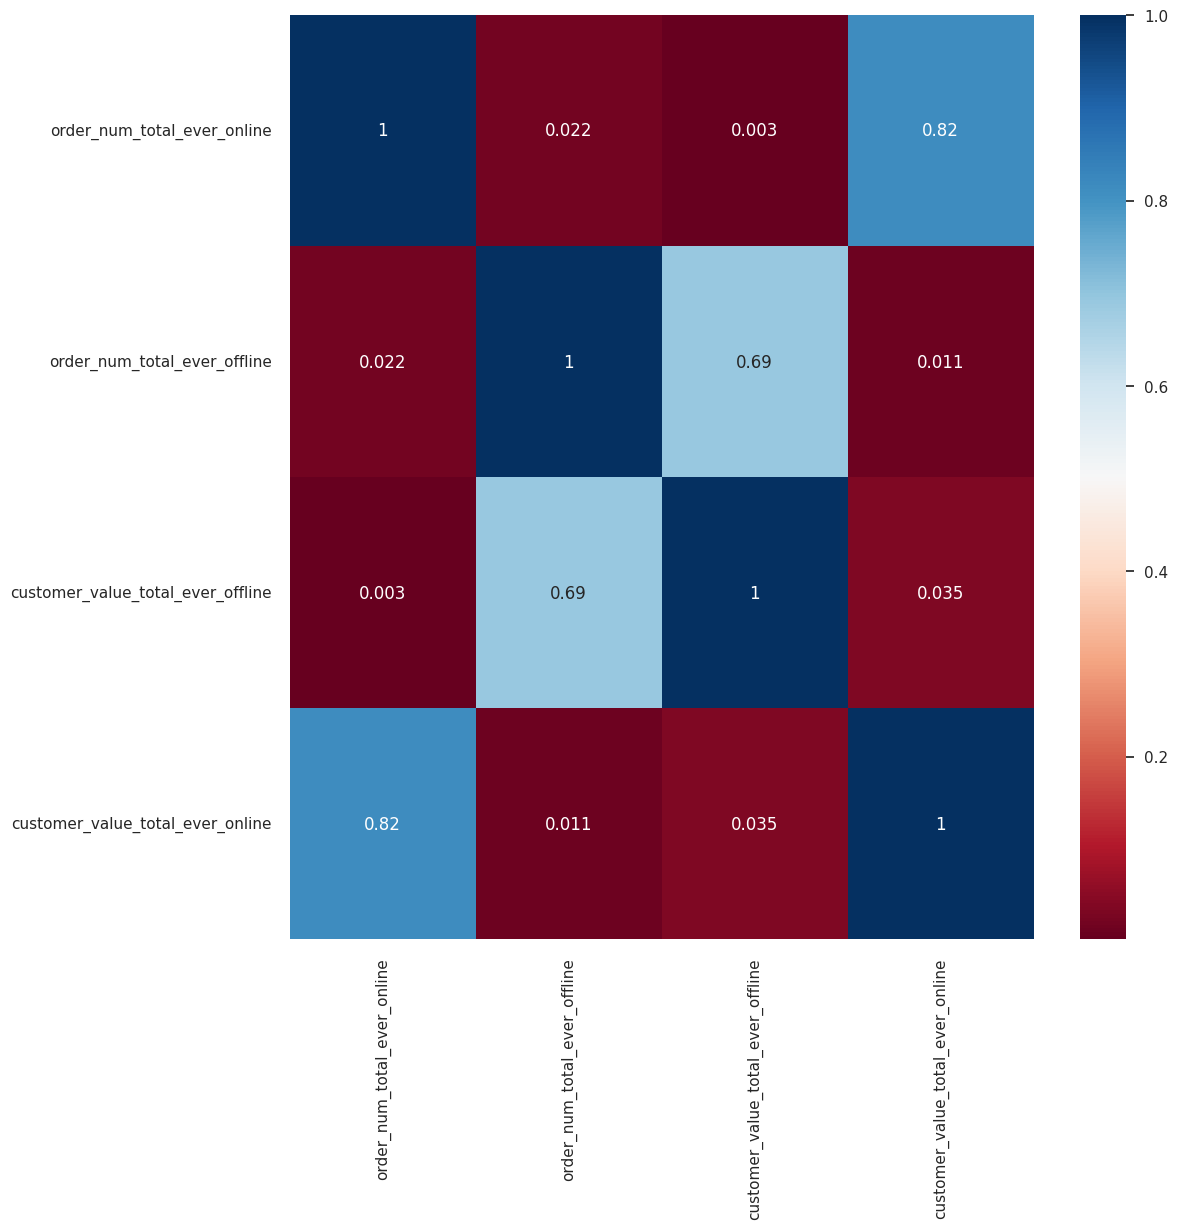

In [36]:
# correlation graph:

sns.set(rc = {"figure.figsize":(12,12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

In [37]:
# high correlation columns 
# list of items to be dropped:

def high_correlated_cols(dataframe,plot= False, corr_th = 0.90):
    import numpy as np
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc = {"figure.figsize":(15,15)})
        sns.heatmap(corr_matrix,cmap = "RdBu")
        plt.show()
    return drop_list

In [38]:
# applying the function:

high_correlated_cols(df[num_cols],plot=False)

[]

<a id = "9"></a>
<div style="background-color:#add8e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>5. Data Preprocessing</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

<a id = "10"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>5.1 Missing Values</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [39]:
# defining a function for missing values:

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [40]:
# checking:

missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


<a id = "11"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>5.2 Outlier Suppression</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [41]:
# outlier suppression:

def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low),variable] = low
    dataframe.loc[(dataframe[variable] > up),variable] = up

In [42]:
df[have_outliers].dtypes

order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
dtype: object

In [43]:
#applying the function:

for col in have_outliers:
    replace_with_thresholds(df, col)

<a id = "12"></a>
<div style="background-color:#add8e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>6. Feature Engineering </b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

<a id = "13"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>6.1 Feature Extraction</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [44]:
#creating new features to prepare

# combine total numbers of online and offline orders

df["order_num_total_ever_online_offline"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]

In [45]:
# combine total values of online and offline orders

df["customer_value_total_ever_online_offline"] = df["customer_value_total_ever_online"] + df["customer_value_total_ever_offline"]

In [46]:
# we defined 2 days after the last order date as the analysis date

today_date = df["last_order_date"].max() + dt.timedelta(days=2)

In [47]:
#calculating recency

df["recency"] = (today_date - df["last_order_date"]).dt.days

In [48]:
#calculating tenure

df["tenure"] = (today_date - df["first_order_date"]).dt.days

In [49]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever_online_offline,customer_value_total_ever_online_offline,recency,tenure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,95,214
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,105,1574
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,186,552
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,135,146
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,86,668


<a id = "14"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>6.2 Feature Scaling</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [50]:
# for numerical columns:

In [51]:
new_num_columns = ["order_num_total_ever_online_offline","customer_value_total_ever_online_offline","recency","tenure"]

In [52]:
num_cols = num_cols + new_num_columns
num_cols

['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'order_num_total_ever_online_offline',
 'customer_value_total_ever_online_offline',
 'recency',
 'tenure']

In [53]:
df_ss = df.copy()

In [54]:
# standardization of numerical variables:

ss = StandardScaler()
df_ss[num_cols] = ss.fit_transform(df_ss[num_cols])

In [55]:
#checking:

df_ss.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever_online_offline,customer_value_total_ever_online_offline,recency,tenure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,0.238015,-0.617699,-0.445912,0.489534,[KADIN],0.005215,0.287466,-0.382058,-1.122127
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,4.171303,0.079331,-0.366316,2.156015,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",3.884308,1.849036,-0.285232,1.476349
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,-0.024204,0.079331,-0.246802,-0.149157,"[ERKEK, KADIN]",0.005215,-0.227228,0.499055,-0.476329
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,-0.548642,-0.617699,-0.844293,-0.644533,"[AKTIFCOCUK, COCUK]",-0.722115,-0.900815,0.005244,-1.252050
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,-0.548642,-0.617699,-0.804455,-0.521215,[AKTIFSPOR],-0.722115,-0.772872,-0.469201,-0.254694


In [56]:
#checking:

df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total_ever_online_offline,customer_value_total_ever_online_offline,recency,tenure
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],5.0,939.37,95,214
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55,105,1574
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",5.0,585.32,186,552
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",2.0,121.97,135,146
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],2.0,209.98,86,668


<a id = "15"></a>
<div style="background-color:#add8e6; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #000000">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>7. Modeling </b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [57]:
#creating new dataframe

to_use = df_ss[['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'order_num_total_ever_online_offline',
 'customer_value_total_ever_online_offline',
 'recency',
 'tenure']]

In [58]:
#changing names of the columns

to_use.columns = ['order_num_total_ever_online',
                  'order_num_total_ever_offline',
                  'customer_value_total_ever_offline',
                  'customer_value_total_ever_online',
                  'frequency',
                  'monetary',
                  'recency',
                  "tenure"]
to_use.head() #display first 5 rows

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,recency,tenure
0,0.238015,-0.617699,-0.445912,0.489534,0.005215,0.287466,-0.382058,-1.122127
1,4.171303,0.079331,-0.366316,2.156015,3.884308,1.849036,-0.285232,1.476349
2,-0.024204,0.079331,-0.246802,-0.149157,0.005215,-0.227228,0.499055,-0.476329
3,-0.548642,-0.617699,-0.844293,-0.644533,-0.722115,-0.900815,0.005244,-1.252050
4,-0.548642,-0.617699,-0.804455,-0.521215,-0.722115,-0.772872,-0.469201,-0.254694


<a id = "16"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>7.1 Customer Segmentation with K-Means</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [59]:
# Determining the optimal number of clusters:

In [60]:
kmeans = KMeans() #model

In [61]:
elbow = KElbowVisualizer(kmeans, k=(2,20)) # elbow method

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=19), k=(2, 20))

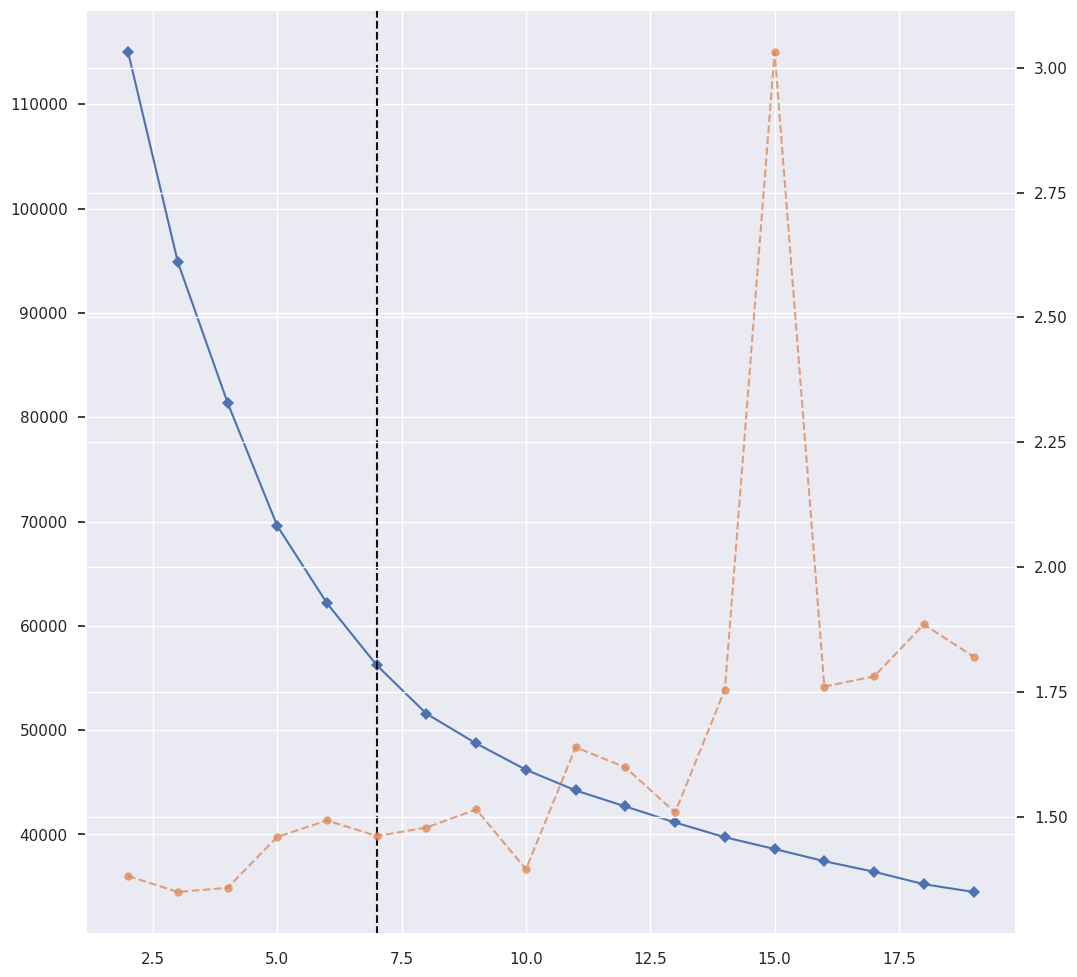

In [62]:
elbow.fit(to_use) #fitting the elbow method

In [63]:
elbow.elbow_value_ # the optimal number of clusters

7

In [64]:
# Building the model and segmenting customers:

In [65]:
kmeans = KMeans(n_clusters = 7).fit(to_use) # fitting the model

In [66]:
kmeans.n_clusters # number of the clusters

7

In [67]:
kmeans.cluster_centers_ # centers of the clusters

array([[-0.29689454, -0.36119071, -0.3336182 , -0.27936008, -0.40013404,
        -0.37864502, -0.63262561, -0.4616199 ],
       [ 5.05380074,  0.23015057,  0.06282127,  4.98052042,  4.75270837,
         4.60309547, -0.41620135,  1.46126511],
       [-0.22642202,  1.2345457 ,  1.17114874, -0.19442192,  0.22005766,
         0.24857059, -0.27983785, -0.12553862],
       [ 0.08634906, -0.08330932, -0.08956892, -0.14843292,  0.05085994,
        -0.16918607,  0.30099262,  2.31862821],
       [ 0.14796754,  4.16959761,  4.29444454,  0.19580594,  1.58709071,
         1.74715373, -0.31473196,  0.31944375],
       [-0.33740159, -0.32246893, -0.31749396, -0.32299198, -0.42411782,
        -0.41288576,  1.19705874, -0.2507914 ],
       [ 1.4490611 , -0.10771269, -0.13616018,  1.4964248 ,  1.30231185,
         1.32645146, -0.34302293,  0.47436762]])

In [68]:
clusters = kmeans.labels_ # labels of the clusters

In [69]:
clusters 

array([0, 6, 5, ..., 0, 2, 5], dtype=int32)

In [70]:
# Let’s analyze each segment statistically:

In [71]:
#creating new dataframe to analyze:

to_use_segment = df[['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'order_num_total_ever_online_offline',
 'customer_value_total_ever_online_offline',
 'recency',
 'tenure']]

In [72]:
#changing names of the columns

to_use_segment.columns = ['order_num_total_ever_online',
                  'order_num_total_ever_offline',
                  'customer_value_total_ever_offline',
                  'customer_value_total_ever_online',
                  'frequency',
                  'monetary',
                  'recency',
                  "tenure"]
to_use_segment.head() #display first 5 rows

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,recency,tenure
0,4.0,1.0,139.99,799.38,5.0,939.37,95,214
1,19.0,2.0,159.97,1853.58,21.0,2013.55,105,1574
2,3.0,2.0,189.97,395.35,5.0,585.32,186,552
3,1.0,1.0,39.99,81.98,2.0,121.97,135,146
4,1.0,1.0,49.99,159.99,2.0,209.98,86,668


In [73]:
to_use_segment["clusters"] = clusters # adding the clusters in the dataframe

In [74]:
to_use_segment.head() # display first 5 rows

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,recency,tenure,clusters
0,4.0,1.0,139.99,799.38,5.0,939.37,95,214,0
1,19.0,2.0,159.97,1853.58,21.0,2013.55,105,1574,6
2,3.0,2.0,189.97,395.35,5.0,585.32,186,552,5
3,1.0,1.0,39.99,81.98,2.0,121.97,135,146,0
4,1.0,1.0,49.99,159.99,2.0,209.98,86,668,0


In [75]:
# functions to calculate Q1 ve Q3 :

def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

In [76]:
#checking each cluster:

to_use_segment.groupby("clusters").agg({"mean","count",q1,"median",q3})

order_num_total_ever_online                                \
                                  q1    q3 count median       mean   
clusters                                                             
0                                1.0   3.0  7911    1.0   1.960056   
1                               17.0  25.0   342   21.0  22.365497   
2                                1.0   3.0  2643    2.0   2.231177   
3                                1.0   5.0  1620    3.0   3.421605   
4                                1.0   5.0   364    2.0   3.656593   
5                                1.0   2.0  5158    1.0   1.805739   
6                                6.0  10.0  1907    8.0   8.618773   

         order_num_total_ever_offline                              ...  \
                                   q1   q3 count median      mean  ...   
clusters                                                           ...   
0                                 1.0  2.0  7911    1.0  1.368095  ...   
1                                 1.0  3.0   342    2.0  2.216374  ...   
2                                 3.0  4.0  2643    4.0  3.658721  ...   
3                                 1.0  2.0  1620    1.0  1.766667  ...   
4                                 6.0  9.0   364    7.0  7.868132  ...   
5                                 1.0  2.0  5158    1.0  1.423808  ...   
6                                 1.0  2.0  1907    1.0  1.729942  ...   

         recency                                  tenure                 \
              q1     q3 count median        mean      q1       q3 count   
clusters                                                                  
0           26.0  108.0  7911   62.0   69.096701   407.0   690.00  7911   
1           24.0  144.0   342   59.5   91.473684   920.0  2158.75   342   
2           40.0  154.0  2643   87.0  105.453651   573.5   821.00  2643   
3           80.0  249.0  1620  153.0  165.544444  1643.0  2337.00  1620   
4           33.0  152.0   364   74.5  101.953297   648.0   967.50   364   
5          199.0  320.0  5158  249.0  258.040132   518.0   797.00  5158   
6           27.0  151.0  1907   74.0   99.048768   636.0  1345.50  1907   

                               
          median         mean  
clusters                       
0          569.0   559.709518  
1         1550.0  1566.105263  
2          688.0   735.966326  
3         2010.5  2014.835185  
4          801.5   968.494505  
5          630.0   669.991857  
6          861.0  1049.277923  

[7 rows x 40 columns]

In [77]:
to_use_segment.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.092304,3.813699,1.00,1.00,2.00,4.00,48.500
order_num_total_ever_offline,19945.0,1.886187,1.434694,1.00,1.00,1.00,2.00,16.000
customer_value_total_ever_offline,19945.0,251.921220,251.022560,10.00,99.99,179.98,319.97,3019.882
customer_value_total_ever_online,19945.0,489.705377,632.606387,12.99,149.98,286.46,578.44,7799.541
frequency,19945.0,4.978491,4.124779,2.00,3.00,4.00,6.00,57.000
monetary,19945.0,741.626596,687.902001,44.98,339.98,545.27,897.78,9063.301
recency,19945.0,134.458360,103.281149,2.00,43.00,111.00,202.00,367.000
tenure,19945.0,801.302833,523.396883,5.00,517.00,651.00,836.00,3060.000
clusters,19945.0,2.465580,2.323521,0.00,0.00,2.00,5.00,6.000


In [78]:
to_use_segment["clusters"].value_counts()

clusters
0    7911
5    5158
2    2643
6    1907
3    1620
4     364
1     342
Name: count, dtype: int64

<a id = "17"></a>
<div style="background-color:#ffcccb; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #b3e5fc">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>7.2 Customer Segmentation with Hierarchical Clustering</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">

In [79]:
# Determining the optimal number of clusters using your standardized dataframe:

In [80]:
#creating new dataframe

hierarchy = df_ss[['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'order_num_total_ever_online_offline',
 'customer_value_total_ever_online_offline',
 'recency',
 'tenure']]

In [81]:
#changing names of the columns

hierarchy.columns = ['order_num_total_ever_online',
                  'order_num_total_ever_offline',
                  'customer_value_total_ever_offline',
                  'customer_value_total_ever_online',
                  'frequency',
                  'monetary',
                  'recency',
                  "tenure"]
hierarchy.head() #display first 5 rows

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,recency,tenure
0,0.238015,-0.617699,-0.445912,0.489534,0.005215,0.287466,-0.382058,-1.122127
1,4.171303,0.079331,-0.366316,2.156015,3.884308,1.849036,-0.285232,1.476349
2,-0.024204,0.079331,-0.246802,-0.149157,0.005215,-0.227228,0.499055,-0.476329
3,-0.548642,-0.617699,-0.844293,-0.644533,-0.722115,-0.900815,0.005244,-1.252050
4,-0.548642,-0.617699,-0.804455,-0.521215,-0.722115,-0.772872,-0.469201,-0.254694


In [82]:
hierarchy_avg = linkage(hierarchy,"average") # linkage

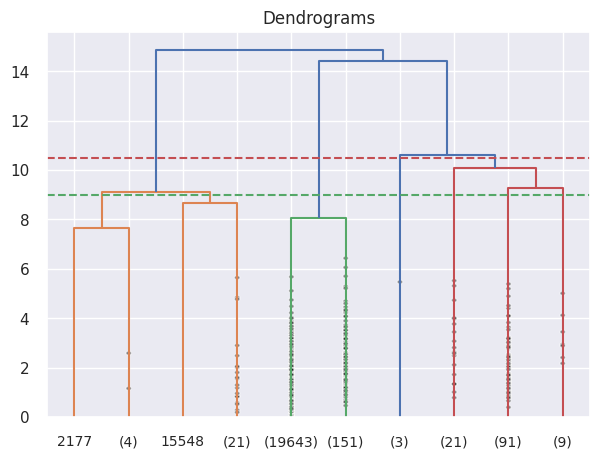

In [83]:
# Determining the optimal number of clusters: 

plt.figure(figsize = (7,5))
plt.title("Dendrograms")
dend = dendrogram(hierarchy_avg,
                 truncate_mode = "lastp",
                 p=10,
                 show_contracted = True,
                 leaf_font_size = 10)

plt.axhline(y = 10.5, color = "r",linestyle = "--" )
plt.axhline(y = 9, color = "g",linestyle = "--" )


plt.show()

> **NOTE:**
> We can determine the optimal number of clusters as 5 by cutting the longest vertical line (the blue one).

In [84]:
# Building the model and segmenting customers:

In [85]:
cluster = AgglomerativeClustering(n_clusters = 5, linkage = "average") 

In [86]:
cluster = cluster.fit_predict(hierarchy)  #fitting the model

In [87]:
cluster 

array([2, 2, 2, ..., 2, 2, 2])

In [88]:
# Let’s analyze each segment statistically:

In [89]:
#creating new dataframe to analyze:

hierarchy_segment = df[['order_num_total_ever_online',
 'order_num_total_ever_offline',
 'customer_value_total_ever_offline',
 'customer_value_total_ever_online',
 'order_num_total_ever_online_offline',
 'customer_value_total_ever_online_offline',
 'recency',
 'tenure']]

In [90]:
#changing names of the columns

hierarchy_segment.columns = ['order_num_total_ever_online',
                  'order_num_total_ever_offline',
                  'customer_value_total_ever_offline',
                  'customer_value_total_ever_online',
                  'frequency',
                  'monetary',
                  'recency',
                  "tenure"]
hierarchy_segment.head() #display first 5 rows

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,frequency,monetary,recency,tenure
0,4.0,1.0,139.99,799.38,5.0,939.37,95,214
1,19.0,2.0,159.97,1853.58,21.0,2013.55,105,1574
2,3.0,2.0,189.97,395.35,5.0,585.32,186,552
3,1.0,1.0,39.99,81.98,2.0,121.97,135,146
4,1.0,1.0,49.99,159.99,2.0,209.98,86,668


In [91]:
hierarchy_segment["hi_cluster_no"] = cluster # adding the clusters to the dataframe

In [92]:
hierarchy_segment["hi_cluster_no"] = hierarchy_segment["hi_cluster_no"] + 1 # to start number 1 

In [93]:
hierarchy_segment["hi_cluster_no"].value_counts() 

hi_cluster_no
3    19794
1      100
2       27
5       21
4        3
Name: count, dtype: int64

In [94]:
# functions to calculate Q1 ve Q3 :

def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

In [95]:
#checking each cluster:

hierarchy_segment.groupby("hi_cluster_no").agg({"mean","count",q1,"median",q3})

order_num_total_ever_online                                 \
                                       q3  count    q1 median       mean   
hi_cluster_no                                                              
1                                    30.0    100  22.0   26.5  26.270000   
2                                     5.5     27   1.0    2.0   4.111111   
3                                     3.0  19794   1.0    2.0   2.922653   
4                                    40.5      3  32.5   40.0  35.333333   
5                                    48.5     21  47.0   48.5  46.714286   

              order_num_total_ever_offline                                ...  \
                                        q3  count   q1 median       mean  ...   
hi_cluster_no                                                             ...   
1                                      3.0    100  1.0    2.0   2.290000  ...   
2                                     16.0     27  9.5   16.0  12.518519  ...   
3                                      2.0  19794  1.0    1.0   1.867839  ...   
4                                     13.0      3  9.5   10.0  11.666667  ...   
5                                      3.0     21  1.0    2.0   2.190476  ...   

              recency                                  tenure                 \
                   q3  count    q1 median        mean      q3  count      q1   
hi_cluster_no                                                                  
1              125.75    100  20.0   48.0   85.740000  2220.0    100   920.0   
2              166.50     27  49.0   84.0  115.962963   840.5     27   671.0   
3              202.00  19794  43.0  112.0  134.789027   835.0  19794   516.0   
4              131.00      3  58.5  109.0   90.000000  1462.5      3  1232.0   
5               98.00     21  32.0   59.0   84.904762  2933.0     21  1234.0   

                                    
               median         mean  
hi_cluster_no                       
1              1596.5  1592.680000  
2               727.0   939.259259  
3               649.0   795.660048  
4              1363.0  1342.000000  
5              2454.0  2096.952381  

[5 rows x 40 columns]

In [96]:
hierarchy_segment.describe().T #descriptive statistics

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.092304,3.813699,1.00,1.00,2.00,4.00,48.500
order_num_total_ever_offline,19945.0,1.886187,1.434694,1.00,1.00,1.00,2.00,16.000
customer_value_total_ever_offline,19945.0,251.921220,251.022560,10.00,99.99,179.98,319.97,3019.882
customer_value_total_ever_online,19945.0,489.705377,632.606387,12.99,149.98,286.46,578.44,7799.541
frequency,19945.0,4.978491,4.124779,2.00,3.00,4.00,6.00,57.000
monetary,19945.0,741.626596,687.902001,44.98,339.98,545.27,897.78,9063.301
recency,19945.0,134.458360,103.281149,2.00,43.00,111.00,202.00,367.000
tenure,19945.0,801.302833,523.396883,5.00,517.00,651.00,836.00,3060.000
hi_cluster_no,19945.0,2.990875,0.160278,1.00,3.00,3.00,3.00,5.000
